## Introduction to Matplotlib

In [1]:
# matplotlib inline is used to keep plots in notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

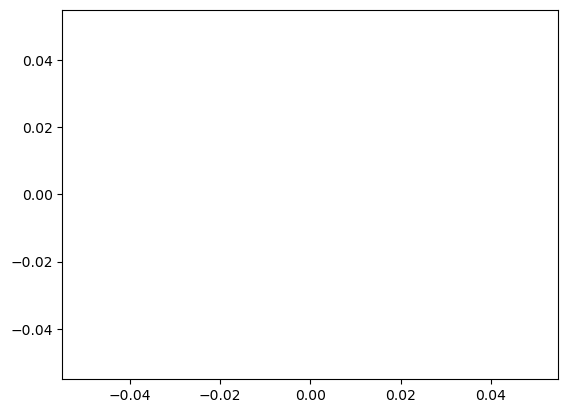

In [2]:
plt.plot();

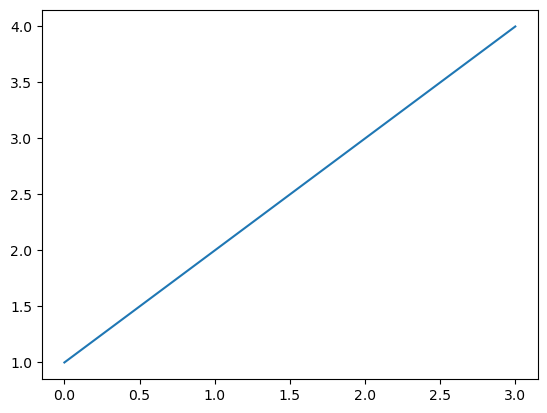

In [3]:
plt.plot([1,2,3,4]);

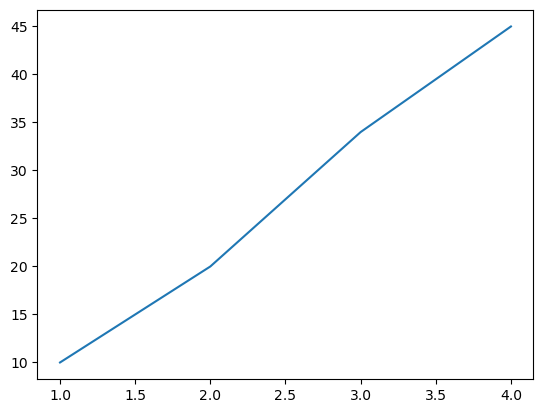

In [4]:
x = [1,2,3,4]
y = [10,20,34,45]
plt.plot(x,y);

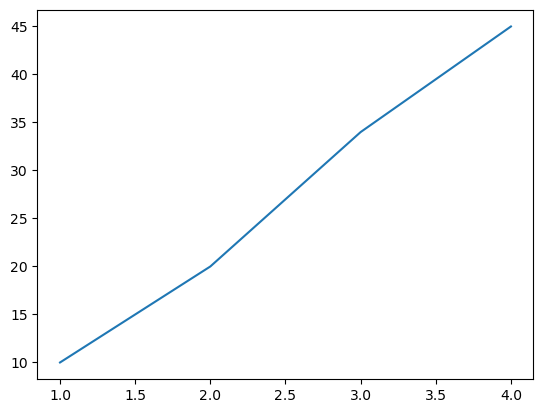

In [5]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # add some axes
ax.plot(x,y) # add some data
plt.show()

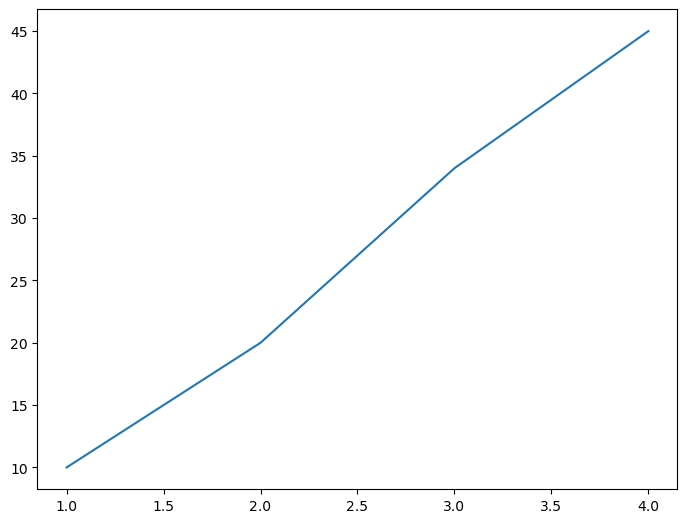

In [6]:
# 2nd method
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

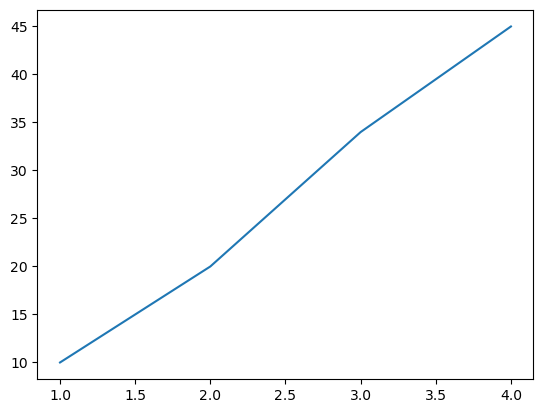

In [7]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x,y); # add some data
type(fig), type(ax)

## Matplotlib example workflow

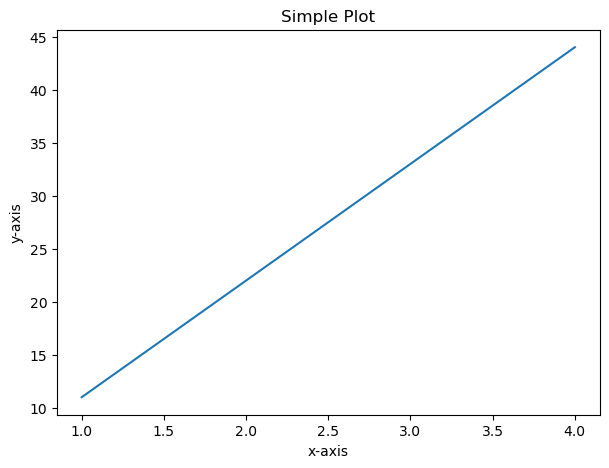

In [8]:
# 0. import matplotlib and get it ready for plotting in Jupytter
%matplotlib inline
import matplotlib.pyplot as plt

#1. prepare data
x = [1,2,3,4]
y = [11,22,33,44]

#2. setup plot
fig,ax = plt.subplots(figsize=(7,5)) #(width,height)

#3. plot data
ax.plot(x,y)

#4. Customize plot
ax.set(title="Simple Plot",
       xlabel="x-axis",
       ylabel="y-axis")

#5. save and show (you save the whole figure)
fig.savefig("images/sample-plot.png")

## Making figures with Numpy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [9]:
# Create some data
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

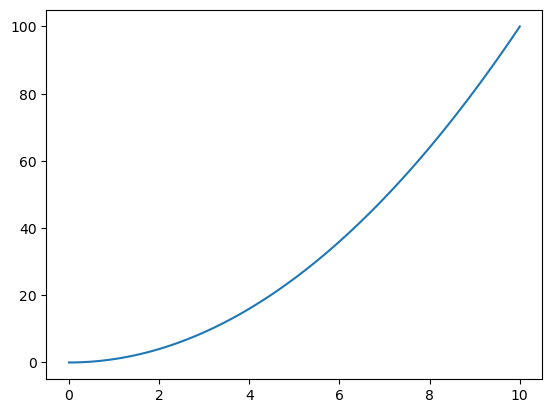

In [10]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x,x**2);

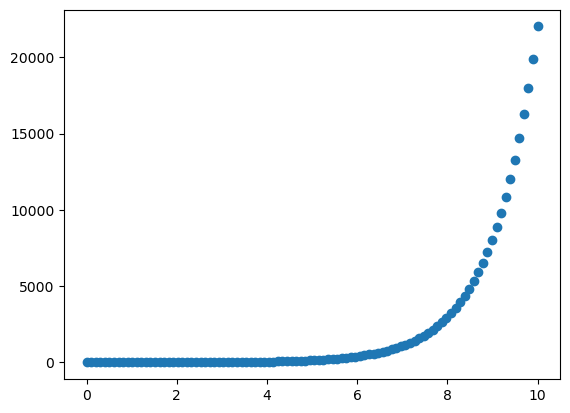

In [11]:
# Use the same data to make a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

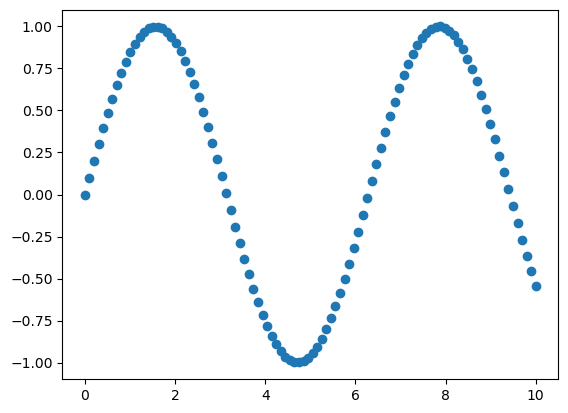

In [12]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

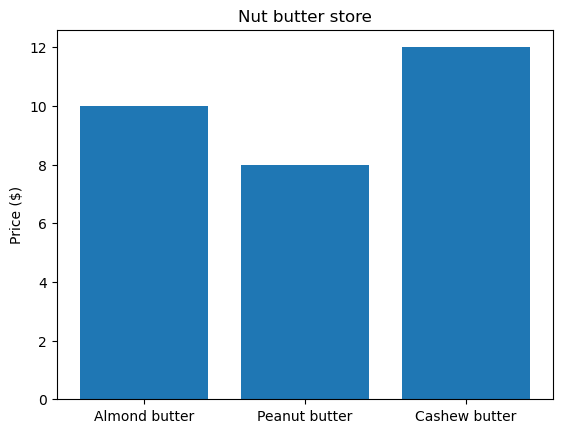

In [13]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter":10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax.set(title="Nut butter store",
       ylabel = "Price ($)");

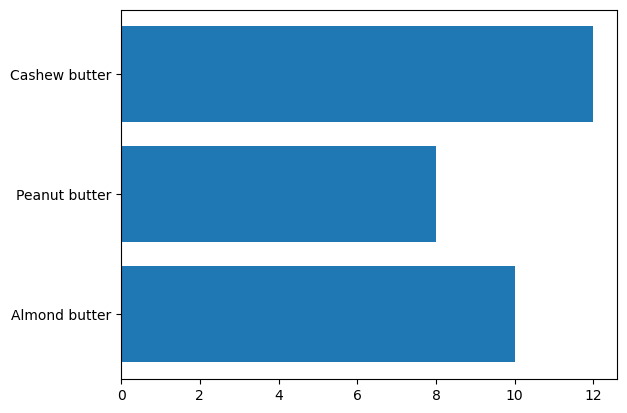

In [14]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values()));

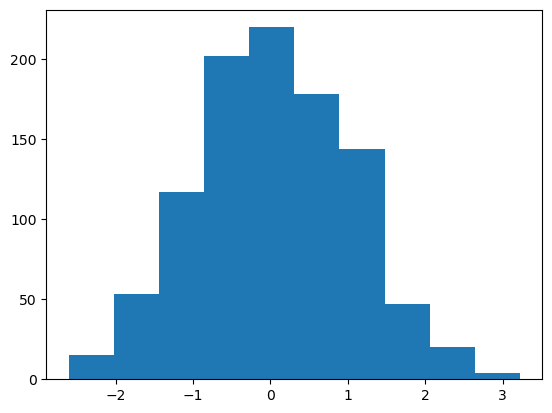

In [15]:
# Make some data for histograms and plot
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

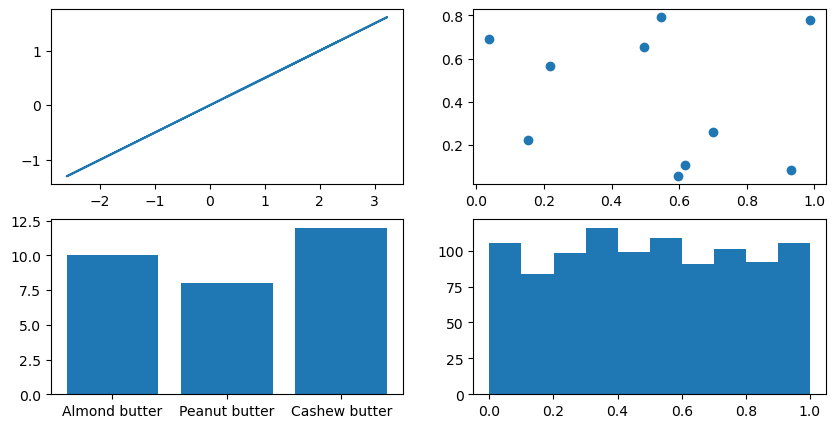

In [16]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10,5))
# Plot to each different axis
ax1.plot(x,x/2);
ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax4.hist(np.random.random(1000));

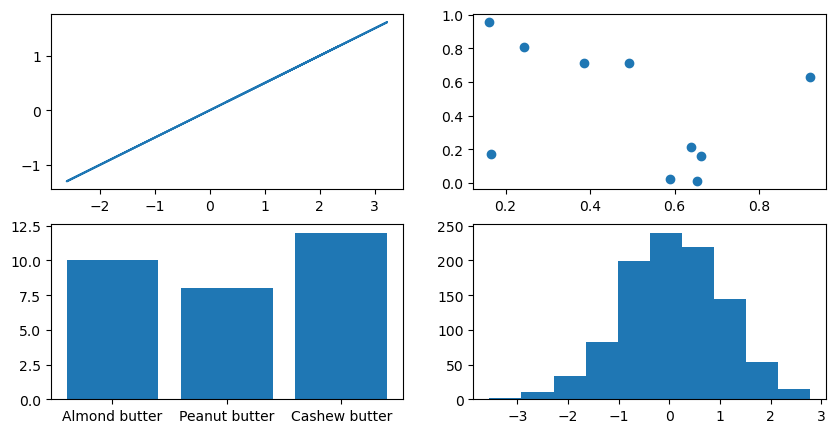

In [17]:
# Subplot option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,5))
# Plot to each different index
ax[0,0].plot(x,x/2);
ax[0,1].scatter(np.random.random(10),np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [18]:
# Make a dataframe
car_sales = pd.read_csv("data/car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


<AxesSubplot: >

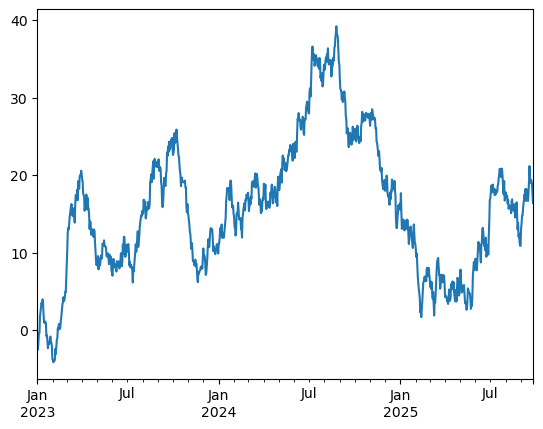

In [19]:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range("1/1/2023", periods=1000))
ts = ts.cumsum()
ts.plot()

In [20]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [21]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]','')
car_sales

/tmp/ipykernel_25463/4215731511.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]','')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [22]:
type(car_sales["Price"][0])

str

In [23]:
# Remove last two zeros
car_sales["Price"] = car_sales['Price'].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [24]:
car_sales["Sales Date"] = pd.date_range("1/1/2023", periods = len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date
0,Toyota,White,150043,4,4000,2023-01-01
1,Honda,Red,87899,4,5000,2023-01-02
2,Toyota,Blue,32549,3,7000,2023-01-03
3,BMW,Black,11179,5,22000,2023-01-04
4,Nissan,White,213095,4,3500,2023-01-05
5,Toyota,Green,99213,4,4500,2023-01-06
6,Honda,Blue,45698,4,7500,2023-01-07
7,Honda,Blue,54738,4,7000,2023-01-08
8,Toyota,White,60000,4,6250,2023-01-09
9,Nissan,White,31600,4,9700,2023-01-10


In [25]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,9000
2,Toyota,Blue,32549,3,7000,2023-01-03,16000
3,BMW,Black,11179,5,22000,2023-01-04,38000
4,Nissan,White,213095,4,3500,2023-01-05,41500
5,Toyota,Green,99213,4,4500,2023-01-06,46000
6,Honda,Blue,45698,4,7500,2023-01-07,53500
7,Honda,Blue,54738,4,7000,2023-01-08,60500
8,Toyota,White,60000,4,6250,2023-01-09,66750
9,Nissan,White,31600,4,9700,2023-01-10,76450


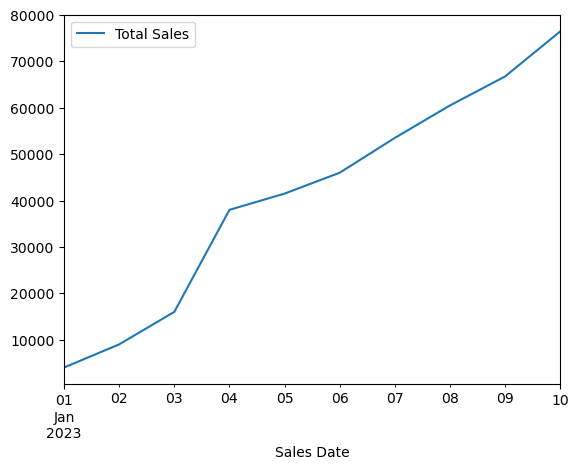

In [26]:
# Let's plot the total sales
car_sales.plot(x="Sales Date", y="Total Sales");

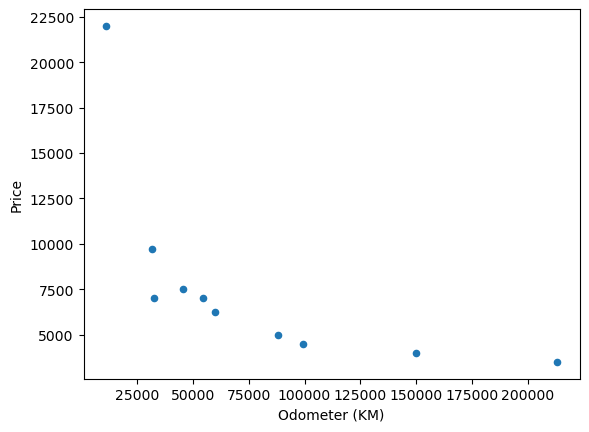

In [27]:
# Reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y = "Price", kind = "scatter" );

In [28]:
# How about a bar graph?
x = np.random.randn(10,4)

# Turn it into a dataframe
df = pd.DataFrame(x, columns=["a","b","c","d"])
df

,a,b,c,d
0,1.401020,0.969577,0.180070,-0.780194
1,1.381653,-0.816204,0.376945,-0.016234
2,0.612411,-1.197759,1.396521,-1.608862
3,-1.378656,-0.488092,-0.169287,-1.026722
4,0.347424,0.819058,-0.510354,0.993557
5,-0.854740,0.044519,0.961165,-0.017991
6,-0.598139,-0.152851,-0.304857,1.203230
7,-0.438956,-0.803088,0.955852,0.212076
8,0.490150,-0.152007,-0.646455,0.225760
9,0.105140,-1.253792,1.052986,-0.055853


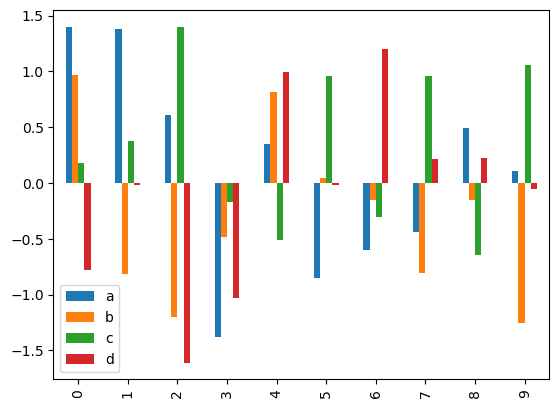

In [29]:
df.plot.bar();

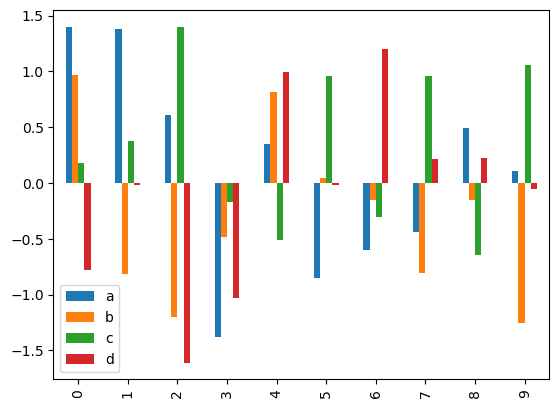

In [30]:
df.plot(kind="bar");

In [31]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,9000
2,Toyota,Blue,32549,3,7000,2023-01-03,16000
3,BMW,Black,11179,5,22000,2023-01-04,38000
4,Nissan,White,213095,4,3500,2023-01-05,41500
5,Toyota,Green,99213,4,4500,2023-01-06,46000
6,Honda,Blue,45698,4,7500,2023-01-07,53500
7,Honda,Blue,54738,4,7000,2023-01-08,60500
8,Toyota,White,60000,4,6250,2023-01-09,66750
9,Nissan,White,31600,4,9700,2023-01-10,76450


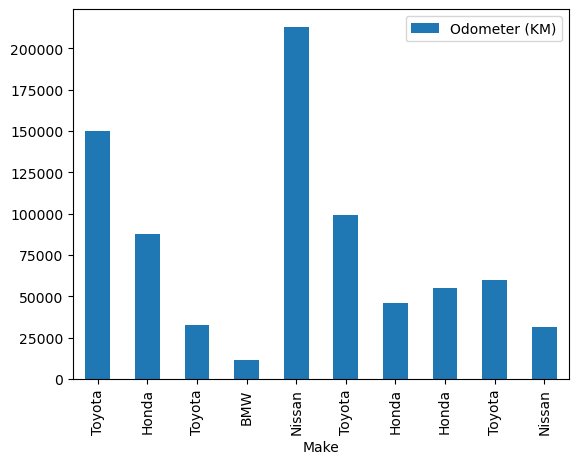

In [32]:
car_sales.plot(x="Make",y="Odometer (KM)", kind = "bar");

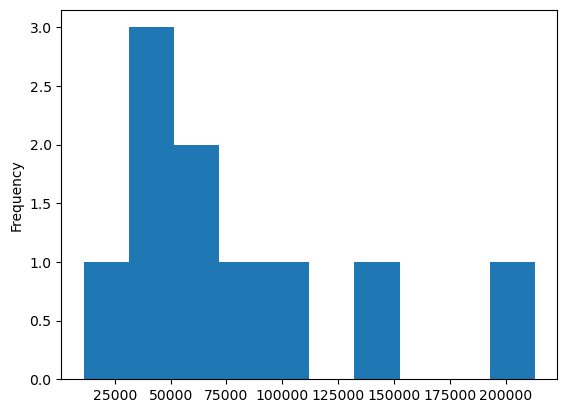

In [33]:
# How about histograms?

car_sales["Odometer (KM)"].plot.hist();

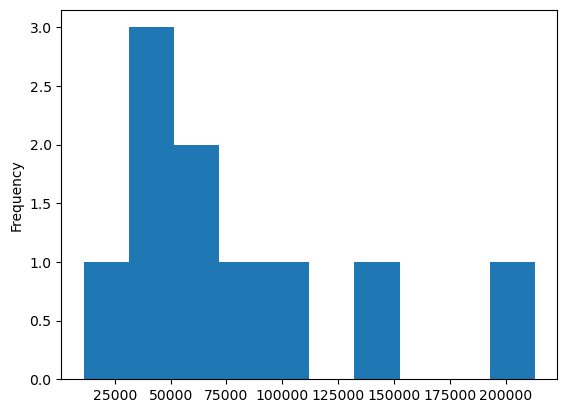

In [34]:
car_sales["Odometer (KM)"].plot(kind="hist");

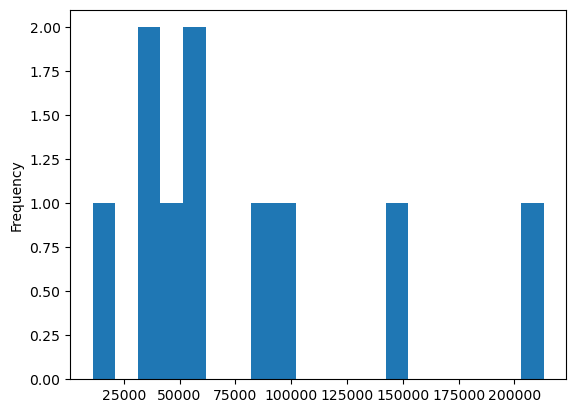

In [35]:
car_sales["Odometer (KM)"].plot.hist(bins = 20);

In [36]:
# Let's try on another dataset
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


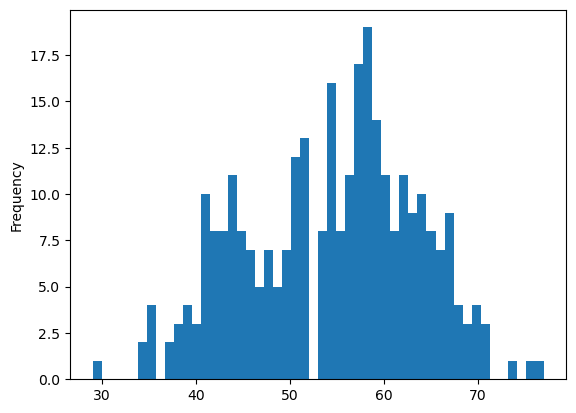

In [37]:
heart_disease["age"].plot.hist(bins=50);

In [38]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


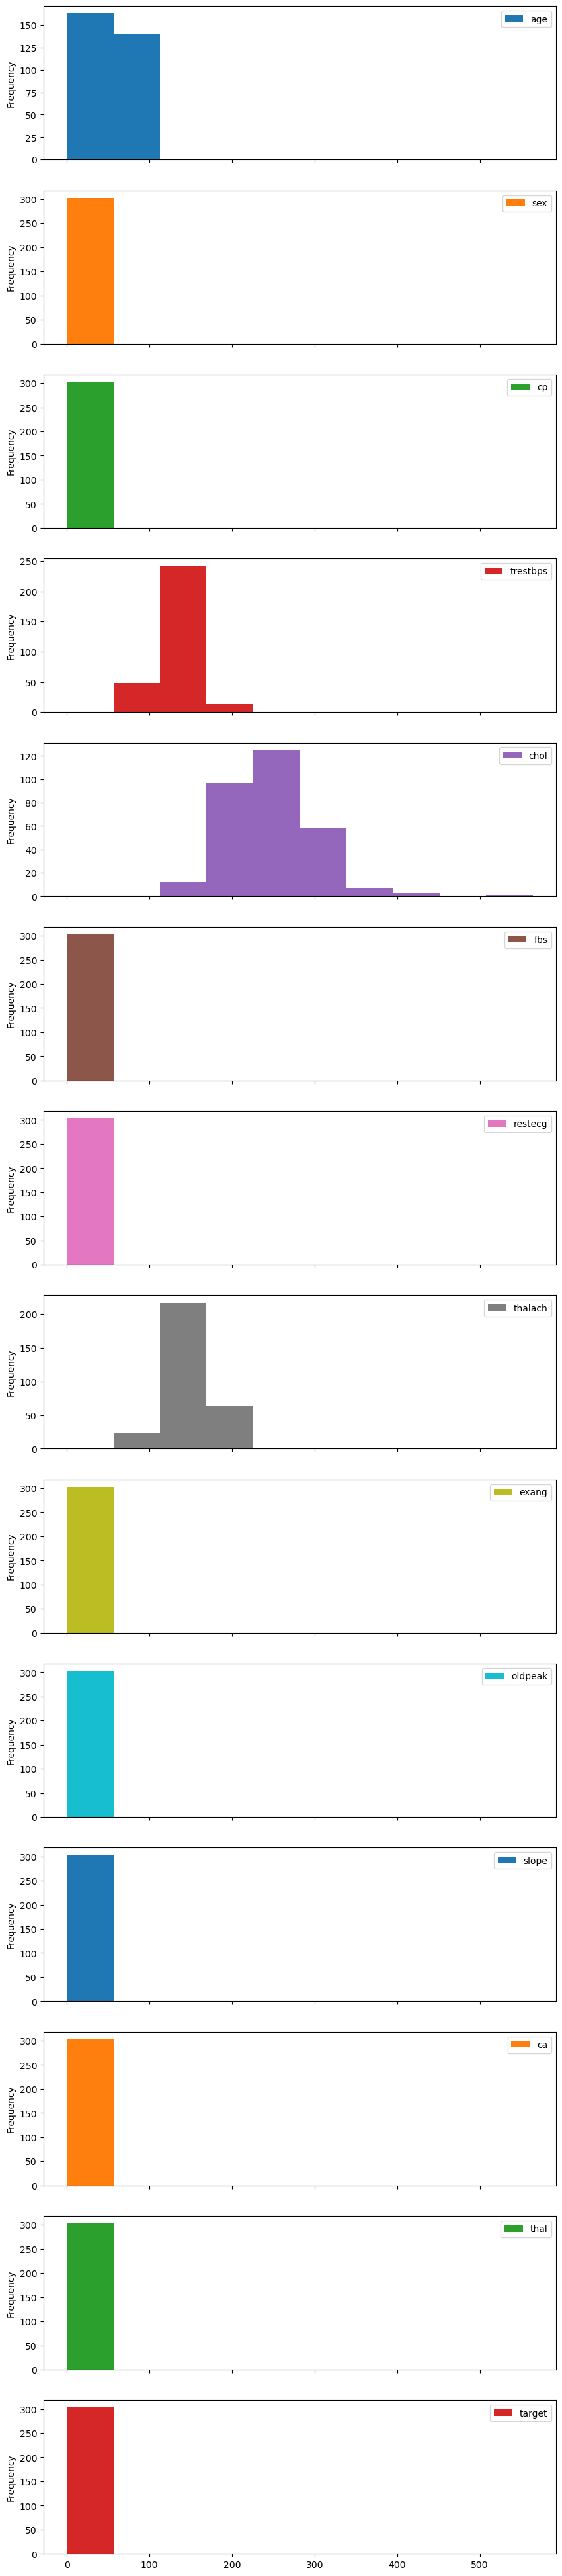

In [39]:
heart_disease.plot.hist(figsize =(10,50), subplots = True);

### Which one should you use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use the OO method

In [40]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


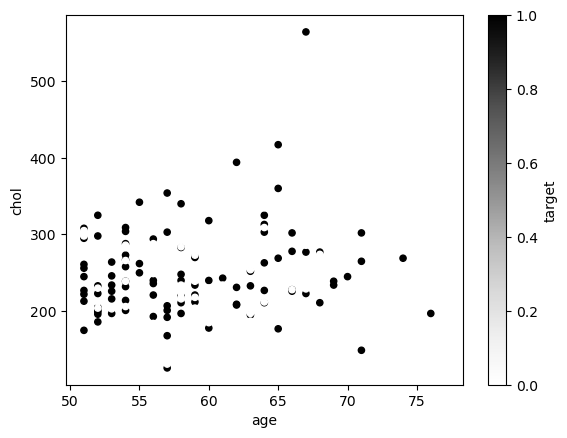

In [42]:
# Pyplot method
over_50.plot(kind="scatter",
             x="age",
             y='chol',
             c = "target");

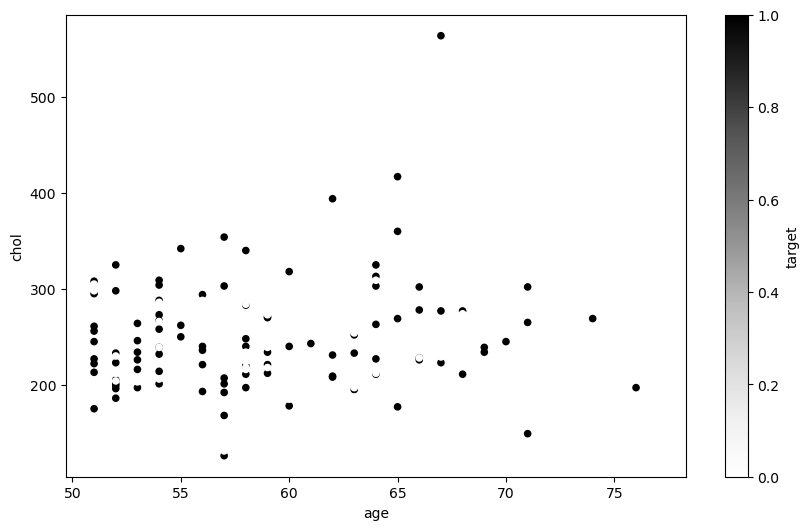

In [43]:
# OO method mixed with pyplot method
fig, ax = plt.subplots(figsize = (10,6))
over_50.plot(kind="scatter",
             x='age',
             y='chol',
             c="target",
             ax=ax);
# ax.set_xlim([45, 100])

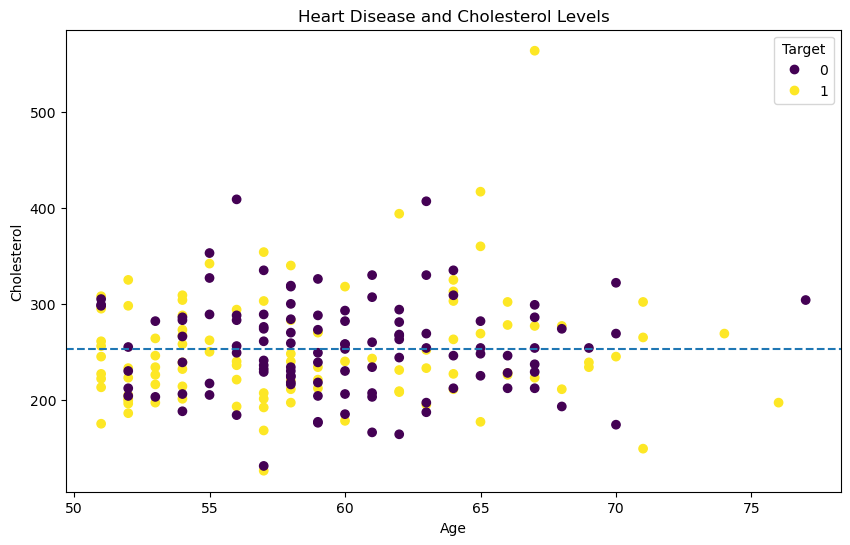

In [44]:
## OO method from scratch
fig, ax = plt.subplots(figsize = (10,6))

# Plot the data
scatter = ax.scatter(x = over_50["age"],
                     y = over_50["chol"],
                     c = over_50["target"]);

# Customize the plot
ax.set(title = "Heart Disease and Cholesterol Levels",
       xlabel = "Age",
       ylabel = "Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle = "--");

In [45]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


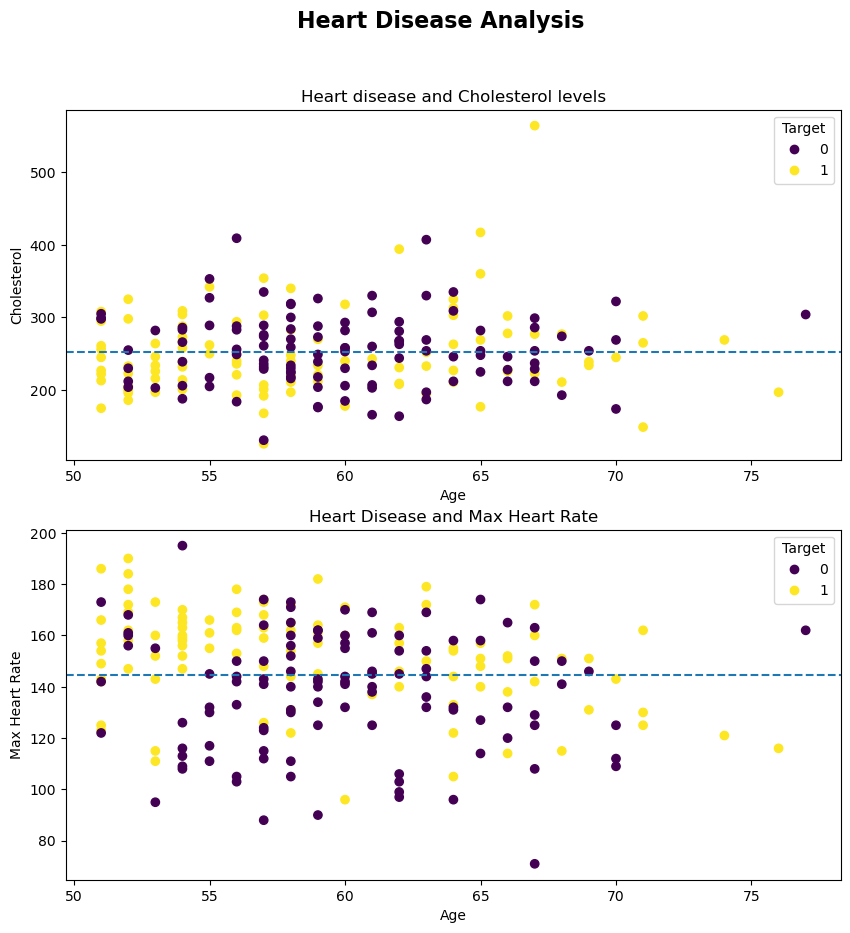

In [46]:
# Subplot of chol, age, thalatch
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10))
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"])

# Customize ax0
ax0.set(title="Heart disease and Cholesterol levels",
        xlabel="Age",
        ylabel="Cholesterol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a mean line to ax0
ax0.axhline(over_50["chol"].mean(),
            linestyle = "--");

# Add data to ax1
scatter1 = ax1.scatter(x=over_50["age"],
                       y=over_50["thalach"],
                       c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Add a legend to ax1
ax1.legend(*scatter1.legend_elements(), title="Target")

# Add a mean line to ax1
ax1.axhline(over_50["thalach"].mean(),
            linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize = 16, fontweight="bold");

## Customizing Matplotlib plots and getting stylish

In [47]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

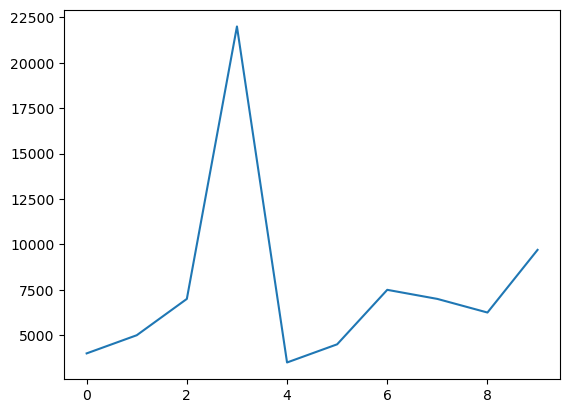

In [48]:
car_sales["Price"].plot();

In [49]:
plt.style.use("seaborn-v0_8-whitegrid")

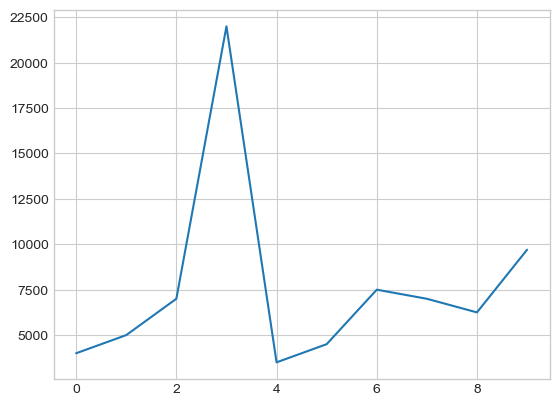

In [50]:
car_sales["Price"].plot();

In [51]:
plt.style.use('seaborn-v0_8')

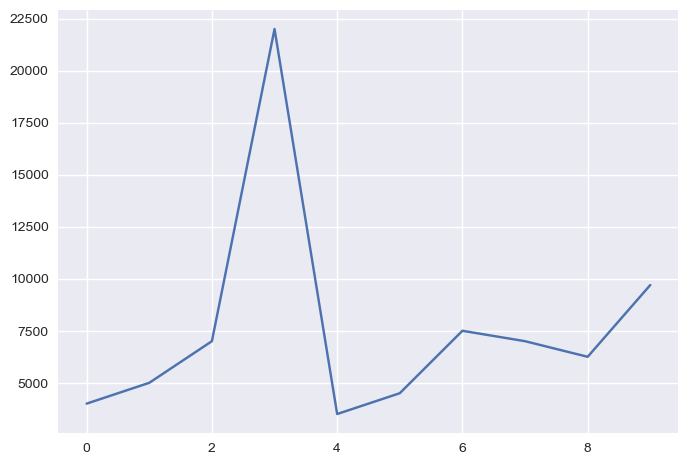

In [52]:
car_sales["Price"].plot();

<AxesSubplot: xlabel='Odometer (KM)', ylabel='Price'>

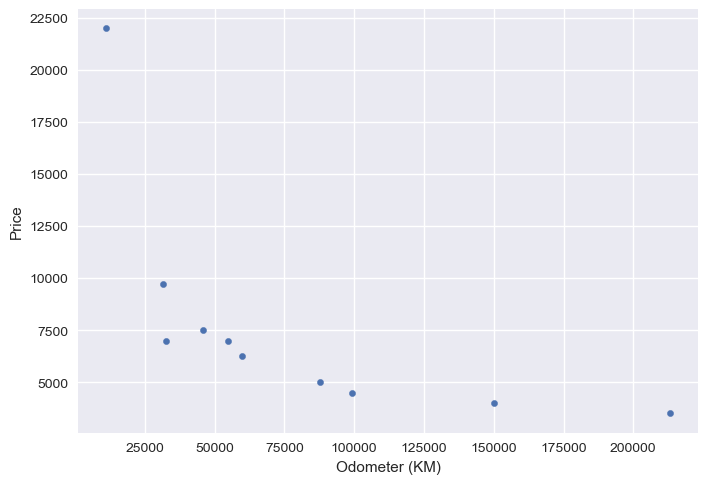

In [53]:
car_sales.plot(x="Odometer (KM)", y="Price", kind = 'scatter')

In [54]:
# Create some data
x = np.random.randn(10,4)
x

array([[ 0.79984217, -0.92312331, -0.19421567, -0.316765  ],
       [-0.40962627, -0.22979339,  1.63151173, -0.33868273],
       [-0.0698792 , -0.28167588,  0.28816108, -1.2034623 ],
       [ 0.26789155,  0.07490135,  0.43237006,  0.92347319],
       [ 0.19708485, -0.06632289, -0.42209542, -0.41220628],
       [-0.85205859,  0.76792193,  1.92316117,  0.99621147],
       [-0.21090923,  0.08969053,  1.30322484,  1.0173918 ],
       [-1.30063855,  0.80781309,  0.18855845, -1.22968469],
       [ 0.17610605, -0.94249976,  1.89073523, -1.0667413 ],
       [-0.25918588, -0.24250979, -2.14921599,  0.96989035]])

In [55]:
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.799842,-0.923123,-0.194216,-0.316765
1,-0.409626,-0.229793,1.631512,-0.338683
2,-0.069879,-0.281676,0.288161,-1.203462
3,0.267892,0.074901,0.432370,0.923473
4,0.197085,-0.066323,-0.422095,-0.412206
5,-0.852059,0.767922,1.923161,0.996211
6,-0.210909,0.089691,1.303225,1.017392
7,-1.300639,0.807813,0.188558,-1.229685
8,0.176106,-0.942500,1.890735,-1.066741
9,-0.259186,-0.242510,-2.149216,0.969890


matplotlib.axes._subplots.AxesSubplot

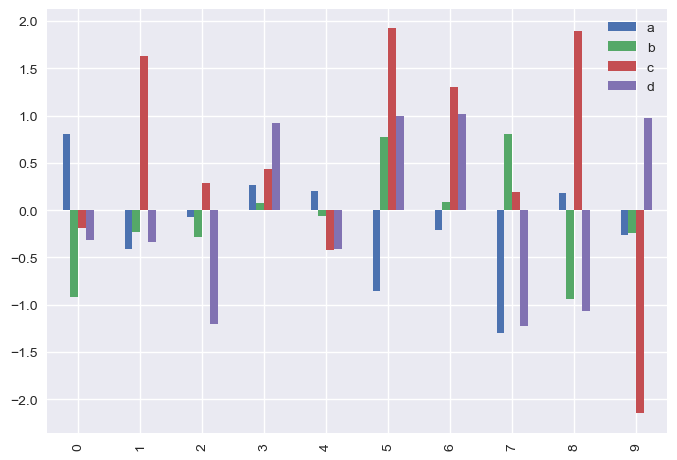

In [56]:
ax = df.plot(kind="bar")
type(ax)

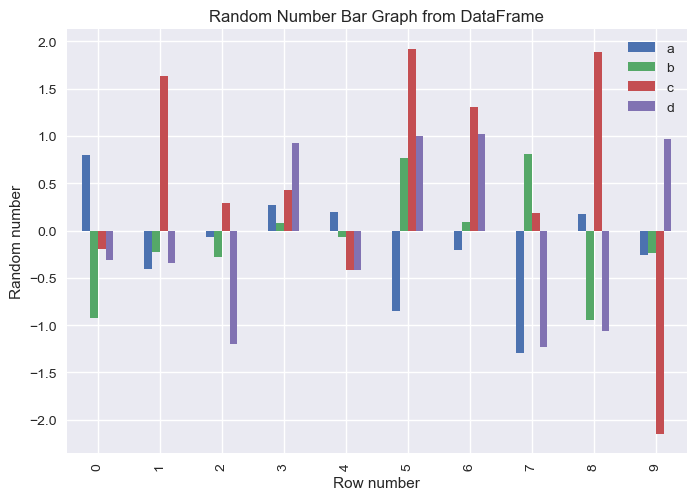

In [57]:
# Customize over plot with the set() method
ax = df.plot(kind="bar")
# Add some labels and a title
ax.set(title="Random Number Bar Graph from DataFrame",
       xlabel="Row number",
       ylabel="Random number")
# Make the legend visible
ax.legend().set_visible(True)

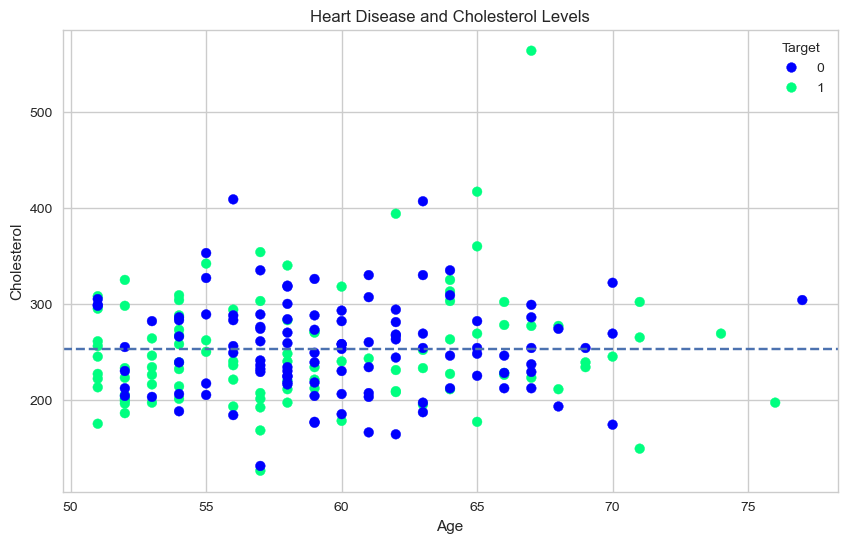

In [58]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

## OO method from scratch
fig, ax = plt.subplots(figsize = (10,6))

# Plot the data
scatter = ax.scatter(x = over_50["age"],
                     y = over_50["chol"],
                     c = over_50["target"],
                     cmap="winter"); # this changes the color scheme

# Customize the plot
ax.set(title = "Heart Disease and Cholesterol Levels",
       xlabel = "Age",
       ylabel = "Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle = "--");

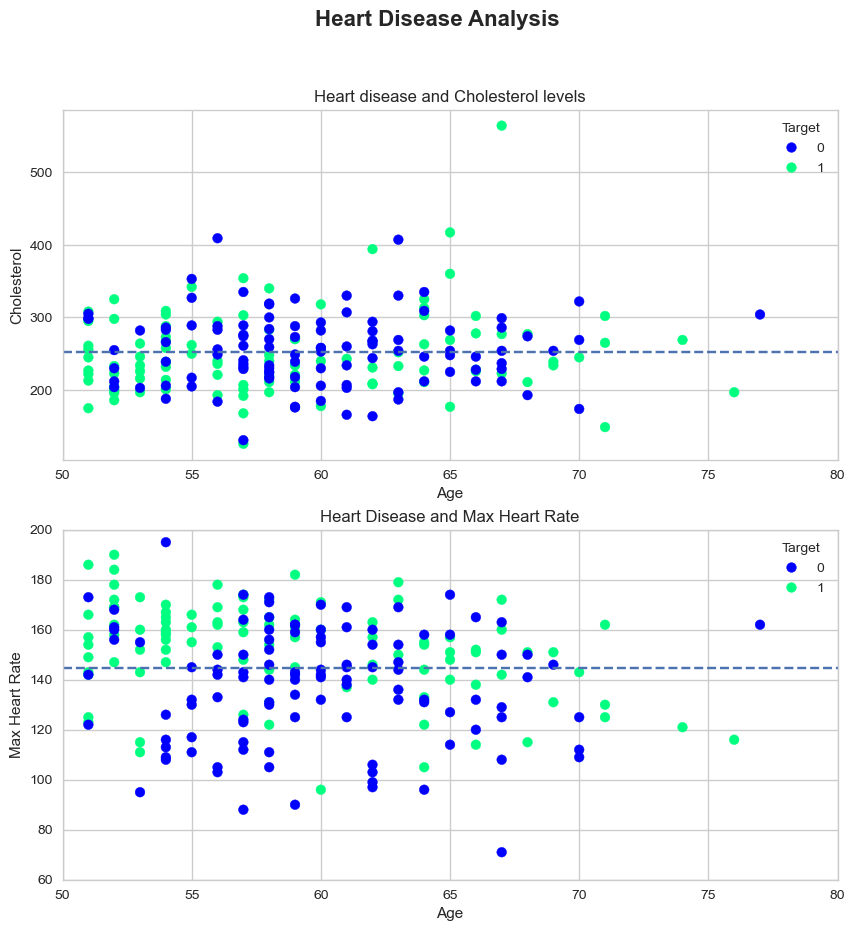

In [59]:
# 

# Subplot of chol, age, thalatch
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10))
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                      cmap="winter")

# Customize ax0
ax0.set(title="Heart disease and Cholesterol levels",
        xlabel="Age",
        ylabel="Cholesterol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a mean line to ax0
ax0.axhline(over_50["chol"].mean(),
            linestyle = "--");

# Change ax0 x and y axis limits
ax0.set_xlim([50,80])
# ax0.set_ylim([50,600])

# Add data to ax1
scatter1 = ax1.scatter(x=over_50["age"],
                       y=over_50["thalach"],
                       c=over_50["target"],
                       cmap="winter")

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Add a legend to ax1
ax1.legend(*scatter1.legend_elements(), title="Target")

# Add a mean line to ax1
ax1.axhline(over_50["thalach"].mean(),
            linestyle="--");

# Change ax1 x and y axis limits
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])
# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize = 16, fontweight="bold");

In [60]:
fig.savefig("images/heart-disease-analysis-plot-saved-with-code.png")